Fitting TSNE!


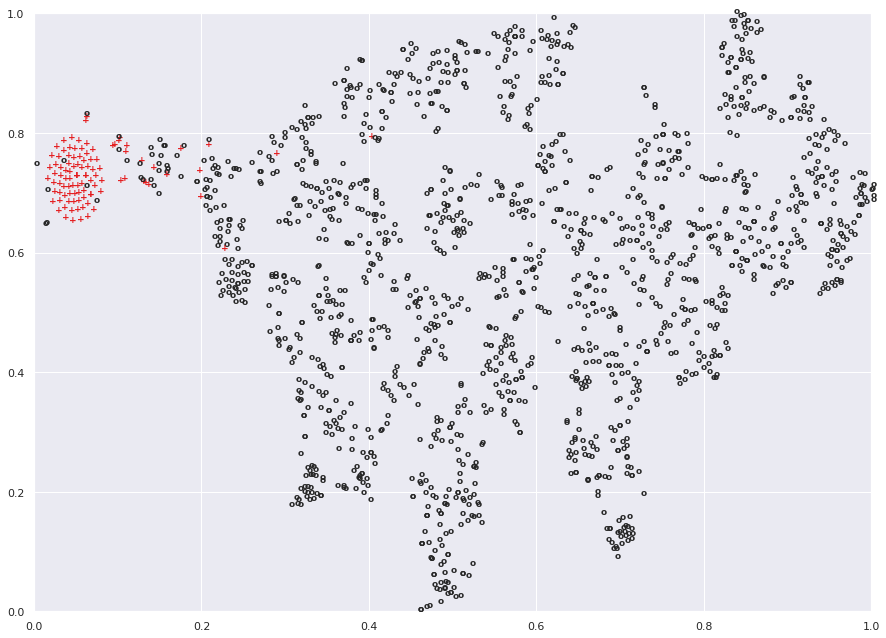

Computing t-SNE embedding
Fitting TSNE!


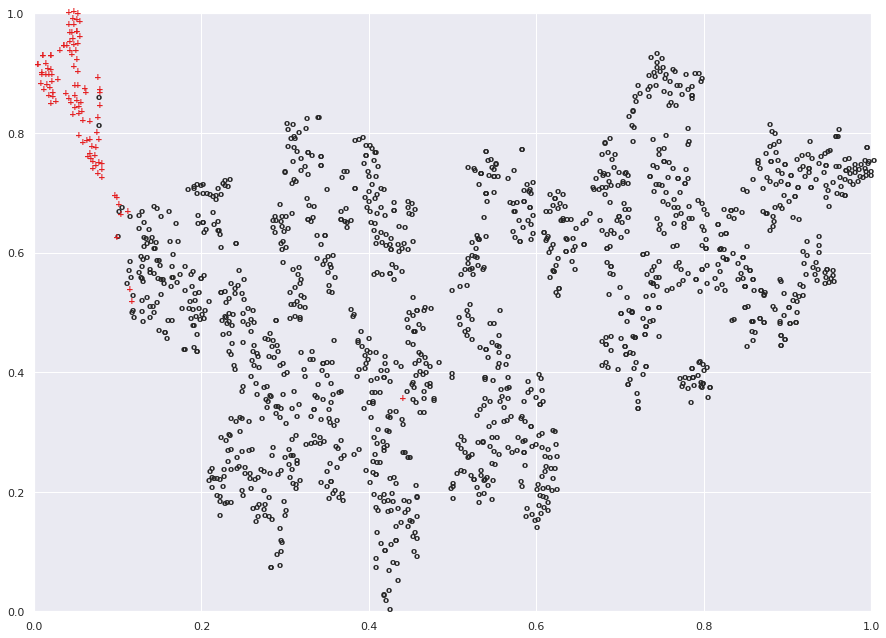

Computing t-SNE embedding
Fitting TSNE!


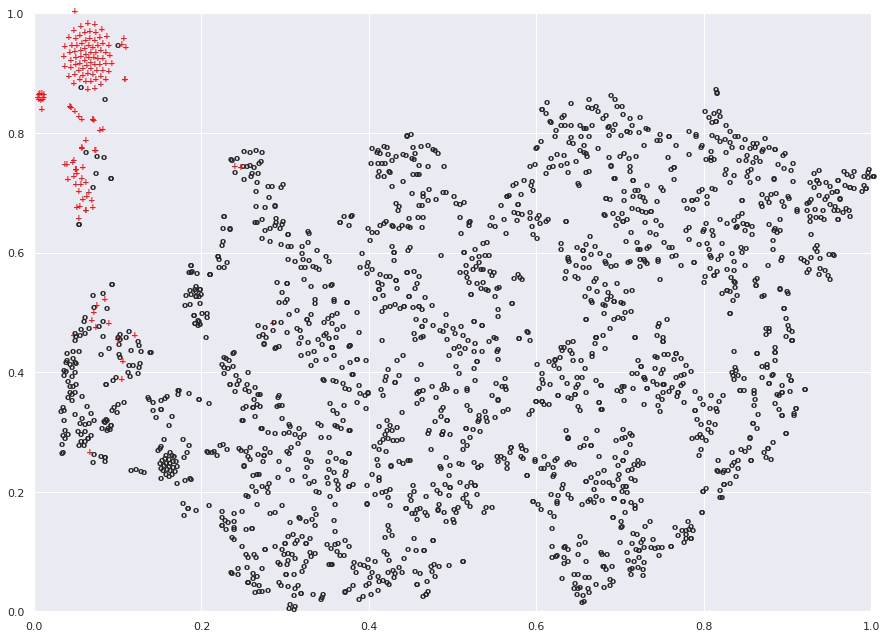

Computing t-SNE embedding
Fitting TSNE!


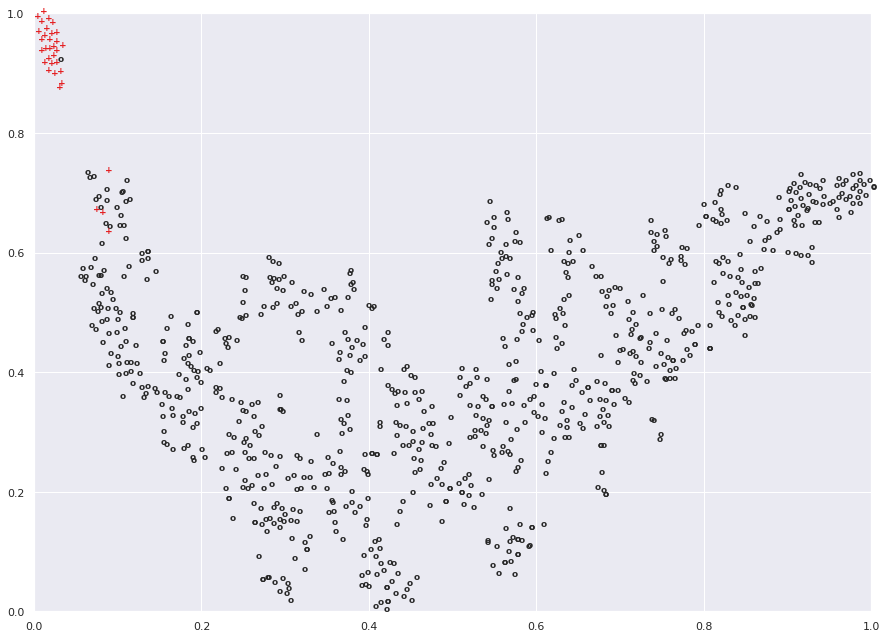

Computing t-SNE embedding
Fitting TSNE!


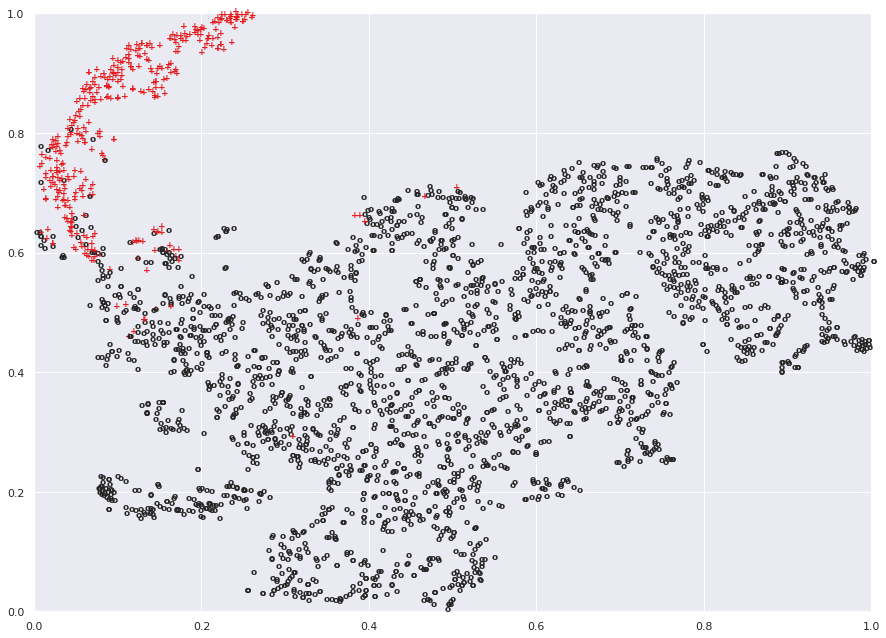

Computing t-SNE embedding
Fitting TSNE!


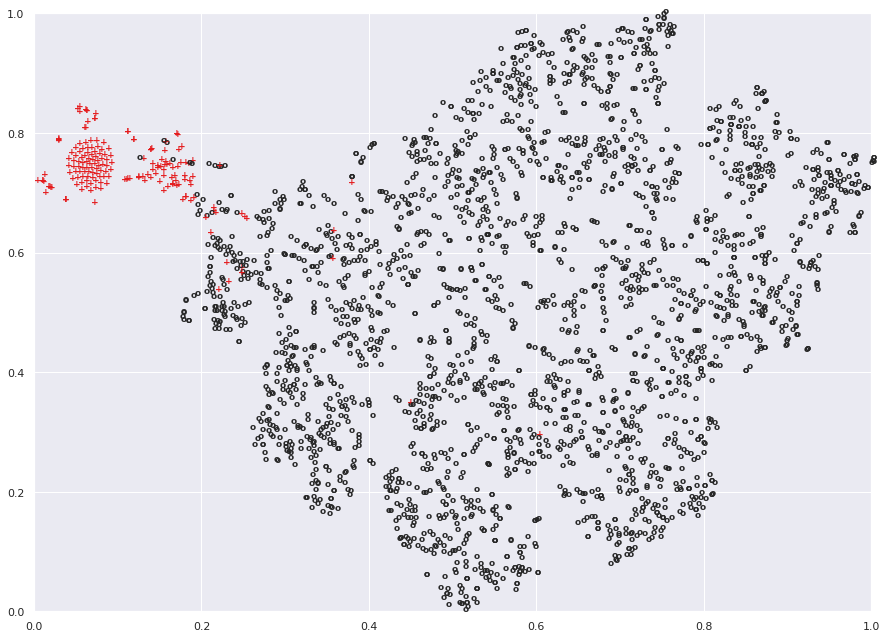

Computing t-SNE embedding
Fitting TSNE!


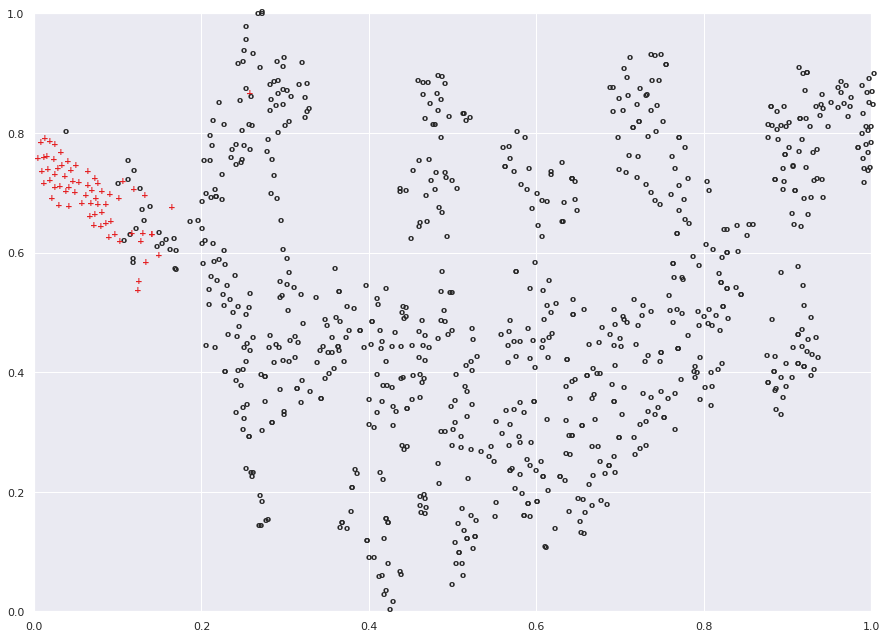

Computing t-SNE embedding


In [3]:
import sys
sys.path.append('..')
from src.includes import *

model_name = 'blstm'
home_path = '/home/swj/VD/'
code_type = 'python'
embedding_path = home_path + 'embedding/'
mode = "command_injection"
ways = 'myway'

sns.set(rc={'figure.figsize':(15,11)})
palette = sns.color_palette("bright", 2)


def plot_embedding(X_org, y, title=None):
    X, _, Y, _ = train_test_split(X_org, y, test_size=0.5)
    X, Y = np.asarray(X), np.asarray(Y)
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    print('Fitting TSNE!')
    X = tsne.fit_transform(X)
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    path = home_path + 'visualization/' + code_type + '/' + model_name + '_' + ways + '/'
    if not os.path.exists(path): os.makedirs(path)
    file_ = open(path + str(title) + '-tsne-features.json', 'w')
    if isinstance(X, np.ndarray):
        _x = X.tolist()
        _y = Y.tolist()
    else:
        _x = X
        _y = Y
    json.dump([_x, _y], file_)
    file_.close()
    plt.figure(title)
    for i in range(X.shape[0]):
        if Y[i] == 0:
            plt.text(X[i, 0], X[i, 1], 'o',
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X[i, 0], X[i, 1], '+',
                     color=plt.cm.Set1(0),
                     fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title("")
    plt.savefig(path + title + '.pdf')
    plt.show()


if __name__ == '__main__':
    modes = ['command_injection', 'open_redirect', 'path_disclosure', 'remote_code_execution', 'sql', 'xsrf', 'xss']
    for mode in modes:
        path = home_path + 'Representation/' + model_name + '_' + ways + '/' + code_type + '/' + mode + '/'    
        X = LoadPickleData(path + 'X_test.pkl')
        y = LoadPickleData(path + 'y_test.pkl')
        x_a = X
        targets = y
        plot_embedding(x_a, targets, mode)
        print("Computing t-SNE embedding")